/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


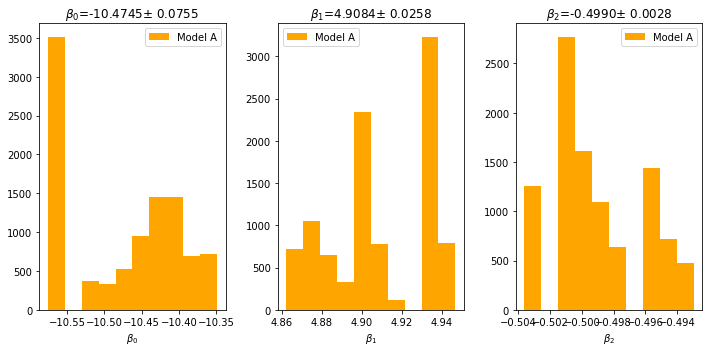

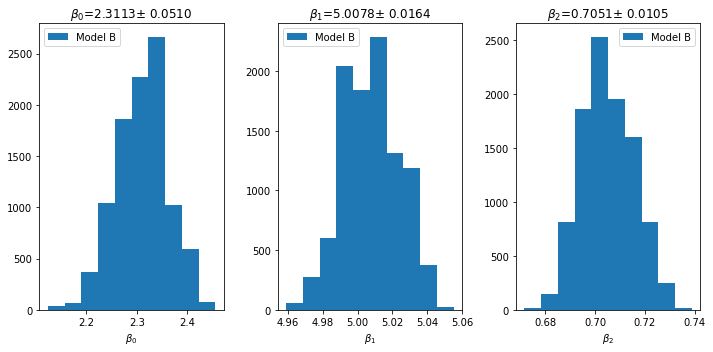

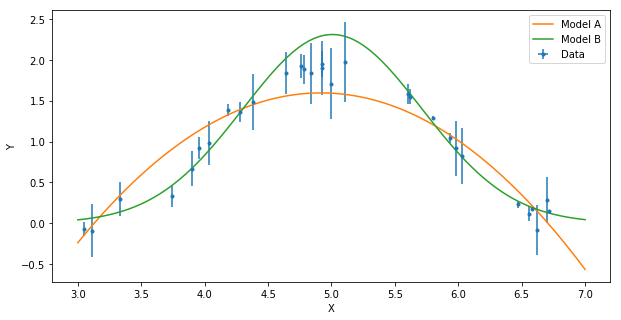

Prob for A: 2.3803736589818113e-36 Prob for B: 2.1452513132662369e-10


In [15]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("Datos/data_to_fit.txt", skiprows=1)
X = data[:,0]
Y = data[:,1]
sigma_y = data[:,2]

def model_A(x, params):
    y = params[0] + params[1] * x + params[2] * x**2
    return y

def model_B(x, params):
    y = params[0]*(np.exp(-0.5*(x - params[1])**2 / params[2]**2))
    return y

def loglike(x, y, sigma_y, params, model):
    L = 0.0
    for i in range(len(y)):
        L += -0.5 * (y[i] - model(x[i], params))**2/sigma_y[i]**2
    return L

def metropolis(N, model, params):
    #params = np.ones(3)
    p = loglike(X, Y, sigma_y, params, model)
    new_params = np.zeros((N, 3))
    for i in range(N):
        params_n = params + np.random.normal(0, 0.05, 3)
        p_n = loglike(X, Y, sigma_y, params_n, model)
        u = np.random.rand()
        if u < min(1, np.exp(p_n - p)):
            p = p_n
            params = params_n
        new_params[i] = params
    return np.array(new_params)

N = 20000
params_A = metropolis(N, model_A, [-12, 0, 0])
params_B = metropolis(N, model_B, np.random.random(3))

plt.figure(figsize=(10,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(params_A[int(N/2):int(N),i],label='Model A',color='orange')
    plt.title(r'$\beta_%1.0f $='%i+'%0.4f' %np.mean(params_A[int(N/2):int(N),i]) + r'$\pm$ %0.4f' %np.std(params_A[int(N/2):int(N),i]))
    plt.xlabel(r'$\beta_%1.0f $'%i)
    plt.legend()
    plt.tight_layout()
#plt.savefig('ajuste_bayes_mcmc.png')
plt.show()

plt.figure(figsize=(10,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(params_B[int(N/2):int(N),i],label='Model B')
    plt.title(r'$\beta_%1.0f $='%i+'%0.4f' %np.mean(params_B[int(N/2):int(N),i]) + r'$\pm$ %0.4f' %np.std(params_B[int(N/2):int(N),i]))
    plt.xlabel(r'$\beta_%1.0f $'%i)
    plt.legend()
    plt.tight_layout()
#plt.savefig('ajuste_bayes_mcmc.png')
plt.show()

x_ = np.linspace(3, 7, 100)
plt.figure(figsize=(10,5))
plt.errorbar(X, Y, yerr=sigma_y, xerr=0, fmt='.', label='Data')
plt.plot(x_, model_A(x_, np.mean(params_A[int(N/2):int(N),:],axis=0)),label='Model A')
plt.plot(x_, model_B(x_, np.mean(params_B[int(N/2):int(N),:],axis=0)),label='Model B')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Prob_A = []
Prob_B = []
for i in range(N):
    Prob_A.append(loglike(X, Y, sigma_y, params_A[i,:], model_A))
    Prob_B.append(loglike(X, Y, sigma_y, params_B[i,:], model_B))
print('Prob for A:', np.mean(np.exp(Prob_A)), 'Prob for B:', np.mean(np.exp(Prob_B)))